In [1]:
%pylab inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

Populating the interactive namespace from numpy and matplotlib


In [2]:
#plot settings
pd.set_option('display.mpl_style', 'default') 
plt.rcParams['figure.figsize'] = (15, 5) # ratio 3:2 plot size

# These are the "Tableau 20" colors as RGB.  
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),  
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),  
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),  
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),  
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]  
  
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.  
for i in range(len(tableau20)):  
    r, g, b = tableau20[i]  
    tableau20[i] = (r / 255., g / 255., b / 255.)

In [3]:
# read in labeled results
victims = pd.read_csv('victims_clean.csv', header=0)
print victims.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1280 entries, 0 to 1279
Data columns (total 11 columns):
event          1280 non-null int64
event.1        1280 non-null object
killed         260 non-null float64
victim_info    1280 non-null object
injured        1020 non-null float64
ridergroup     1080 non-null object
name           447 non-null object
age            286 non-null object
gender         365 non-null object
profession     157 non-null object
condition      132 non-null object
dtypes: float64(2), int64(1), object(8)
memory usage: 120.0+ KB
None


In [4]:
victims['killed'] = victims['killed'].astype('object')
victims['injured'] = victims['injured'].astype('object')
print victims.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1280 entries, 0 to 1279
Data columns (total 11 columns):
event          1280 non-null int64
event.1        1280 non-null object
killed         260 non-null object
victim_info    1280 non-null object
injured        1020 non-null object
ridergroup     1080 non-null object
name           447 non-null object
age            286 non-null object
gender         365 non-null object
profession     157 non-null object
condition      132 non-null object
dtypes: int64(1), object(10)
memory usage: 120.0+ KB
None


In [5]:
victims.groupby(['ridergroup']).size()

ridergroup
 AUV passenger                                                 1
 SUV driver                                                    3
 SUV passenger                                                 6
 UV express passenger                                          1
 army truck passenger                                          4
 bicycle driver                                                1
 bicycle rider                                                 2
 bus conductor                                                 1
 bus driver                                                    3
 bus passenger                                               188
 bus passengers                                               45
 bystander                                                    35
 car driver                                                   13
 car passenger                                                23
 car passenger: hospital: Quirino Memorial Medical Center      1
...
 trailer t

In [6]:
victims.head()

,event,event.1,killed,victim_info,injured,ridergroup,name,age,gender,profession,condition
0,0,Motorcycle rider dies in EDSA mishap,1,name: Ryan Ragas; age: 29; profession: securit...,NaN,motorcycle driver,Ryan Ragas,29,NaN,security guard,NaN
1,1,2 killed in Pangasinan road accident | Inquire...,1,name: Joseph Quiban; age: 32; gender: male; ri...,NaN,motorcycle driver,Joseph Quiban,32,male,NaN,NaN
2,2,2 killed in Pangasinan road accident | Inquire...,1,name: Lyndon Ordanez; age: 18; gender: male; r...,NaN,motorcycle driver,Lyndon Ordanez,18,male,NaN,NaN
3,3,"Customs officer killed, 2 hurt in QC road mishap",1,name: Alfonso Mallari; age: 73; gender: male; ...,NaN,driver,Alfonso Mallari,73,male,Bureau of Customs Officer,NaN
4,4,"1 dead, 7 hurt in CamSur road accident | Inqui...",1,ridergroup: motorcycle driver; name: Verni Loc...,NaN,motorcycle driver,Verni Locete,NaN,NaN,NaN,dead on spot


In [7]:
victims.ridergroup.unique()

array([' motorcycle driver', ' driver', ' bystander', ' motorcycle rider',
       nan, ' passenger', ' jeepney passenger', ' pedestrian',
       ' drivercauseofdeath: car slammed into a gutter', ' cyclist',
       ' truck passenger', ' bus passenger', ' motorcycle passenger',
       ' truck driver', ' truck passengers', ' bicycle rider',
       ' motorycle rider', ' van driver', ' jeep passenger',
       ' tricycle passenger',
       ' jeepney passenger: causeofdeath: jeep hit a stone wall',
       ' pickup truck driver', ' car driver', ' car passenger',
       'tricycle driver', ' trailer truck driver', ' delivery van driver',
       ' delivery van passengers ', ' cement mixer driver',
       ' truck passenger: name: Jess Jurios', ' gender: male',
       ' van passenger', ' jeepney driver', ' car rider', ' SUV passenger',
       ' traffic enforcer', ' bicycle driver', ' passengers', ' jeepney',
       ' delivery truck helper', ' AUV passenger', ' SUV driver',
       ' mini bus passeng

In [8]:
def simplify_ridergroups(ridertype):
    if "passenger" in ridertype:
        return "passenger"
    elif "porter" in ridertype:
        return "passenger"
    elif "conductor" in ridertype:
        return "passenger"
    elif "driver" in ridertype:
        return "driver"
    elif "helper" in ridertype:
        return "passenger"
    elif "bicycle rider" in ridertype:
        return "bystander, pedestrian, cyclist"
    elif "cyclist" in ridertype:
        return "bystander, pedestrian, cyclist"
    elif "bus rider" in ridertype:
        return "passenger"
    elif "employee" in ridertype:
        return "bystander, pedestrian, cyclist"
    elif "pedestrian" in ridertype:
        return "bystander, pedestrian, cyclist"
    elif "customer" in ridertype:
        return "bystander, pedestrian, cyclist"
    elif "employee" in ridertype:
        return "bystander, pedestrian, cyclist"
    elif "enforcer" in ridertype:
        return "bystander, pedestrian, cyclist"
    else:
        return "unknown"

# Looking at who gets killed by genders and ridergroups

In [9]:
# simplify ridergroups into passenger, driver and other
victims.ridergroup = victims.ridergroup.dropna().apply(simplify_ridergroups)
victims.ridergroup.unique()

array(['driver', 'unknown', nan, 'passenger',
       'bystander, pedestrian, cyclist'], dtype=object)

In [10]:
def clean_genders(gender):
    if "female" in gender:
        return "female"
    elif "male" in gender:
        return "male"
    else:
        return "unknown"

In [11]:
victims.gender = victims.gender.dropna().apply(clean_genders)
victims.gender.unique()

array([nan, 'male', 'female'], dtype=object)

In [12]:
by_ridergroup = victims.groupby(['ridergroup', 'gender'])

In [13]:
by_ridergroup.size().unstack('ridergroup')

ridergroup,"bystander, pedestrian, cyclist",driver,passenger,unknown
gender,,,,
female,3,3,122,7
male,13,56,104,18


In [14]:
injured = victims[victims.injured == 1]
killed = victims[victims.killed == 1]

In [15]:
killed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260 entries, 0 to 259
Data columns (total 11 columns):
event          260 non-null int64
event.1        260 non-null object
killed         260 non-null object
victim_info    260 non-null object
injured        0 non-null object
ridergroup     232 non-null object
name           164 non-null object
age            93 non-null object
gender         134 non-null object
profession     55 non-null object
condition      89 non-null object
dtypes: int64(1), object(10)
memory usage: 24.4+ KB


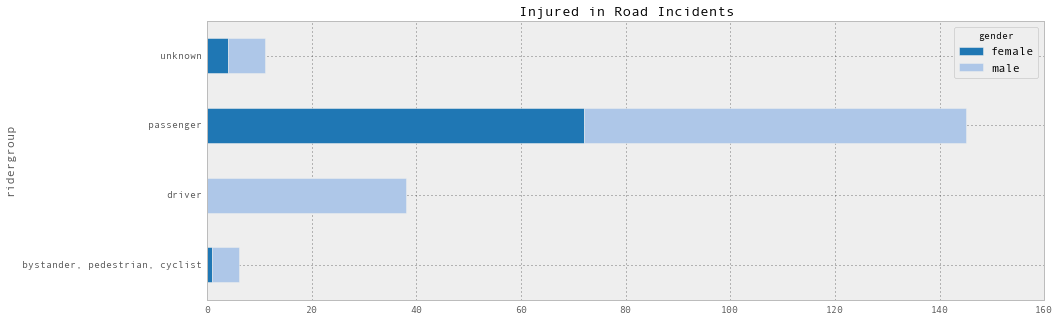

In [16]:
injured_by_ridergroup = injured.groupby(['ridergroup', 'gender'])
injured_by_ridergroup.size().unstack('gender').plot(kind='barh', stacked=True, 
                                                    color=tableau20, title="Injured in Road Incidents")

In [17]:
print injured.count()
injured.groupby(['ridergroup','gender']).count()['injured']

event          1020
event.1        1020
killed            0
victim_info    1020
injured        1020
ridergroup      848
name            283
age             193
gender          231
profession      102
condition        43
dtype: int64


ridergroup                      gender
bystander, pedestrian, cyclist  female     1
                                male       5
driver                          male      38
passenger                       female    72
                                male      73
unknown                         female     4
                                male       7
Name: injured, dtype: int64

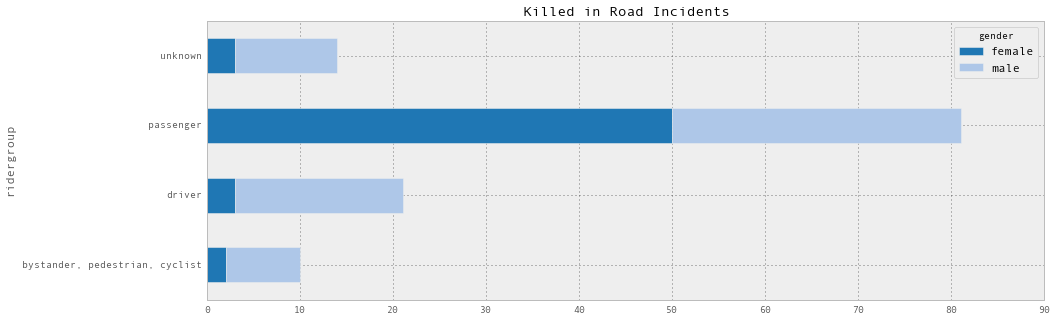

In [18]:
killed_by_ridergroup = killed.groupby(['ridergroup', 'gender'])
killed_by_ridergroup.size().unstack('gender').plot(kind='barh', stacked=True, 
                                                   color=tableau20,
                                                  title='Killed in Road Incidents')

In [19]:
print killed.gender.count()
killed.groupby(['ridergroup','gender']).count()['killed']


134


ridergroup                      gender
bystander, pedestrian, cyclist  female     2
                                male       8
driver                          female     3
                                male      18
passenger                       female    50
                                male      31
unknown                         female     3
                                male      11
Name: killed, dtype: int64

In [20]:
killed.groupby(['gender']).count()['killed']

gender
female    59
male      75
Name: killed, dtype: int64

In [21]:
killed.groupby(['ridergroup']).count()['killed']

ridergroup
bystander, pedestrian, cyclist     12
driver                             51
passenger                         146
unknown                            23
Name: killed, dtype: int64

gender
female    59
male      75
dtype: int64


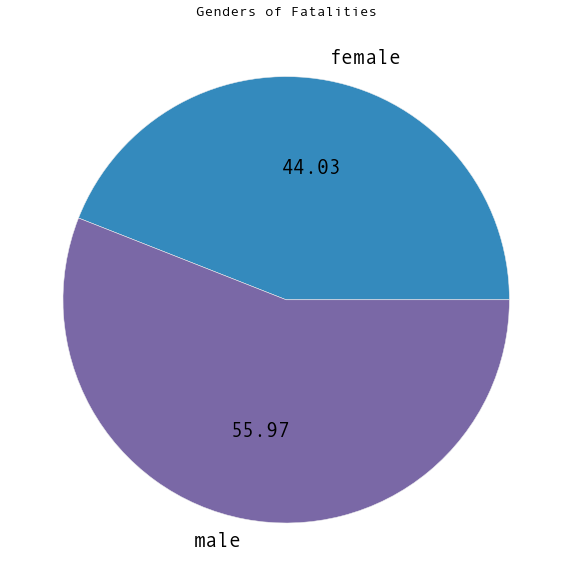

In [22]:
print killed.groupby(['gender']).size()
killed.groupby(['gender']).size().plot(kind='pie', figsize=(10,10), autopct='%.2f', fontsize=20, title="Genders of Fatalities")

gender
female     82
male      149
dtype: int64


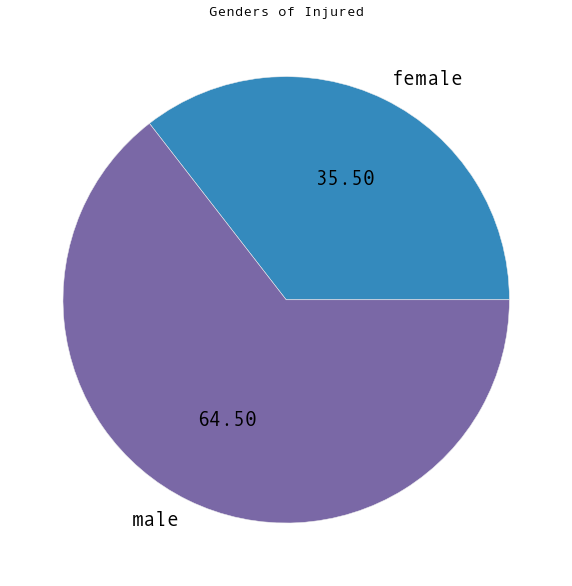

In [23]:
print injured.groupby(['gender']).size()
injured.groupby(['gender']).size().plot(kind='pie', figsize=(10,10), autopct='%.2f', fontsize=20, title="Genders of Injured")

ridergroup
bystander, pedestrian, cyclist     12
driver                             51
passenger                         146
unknown                            23
dtype: int64


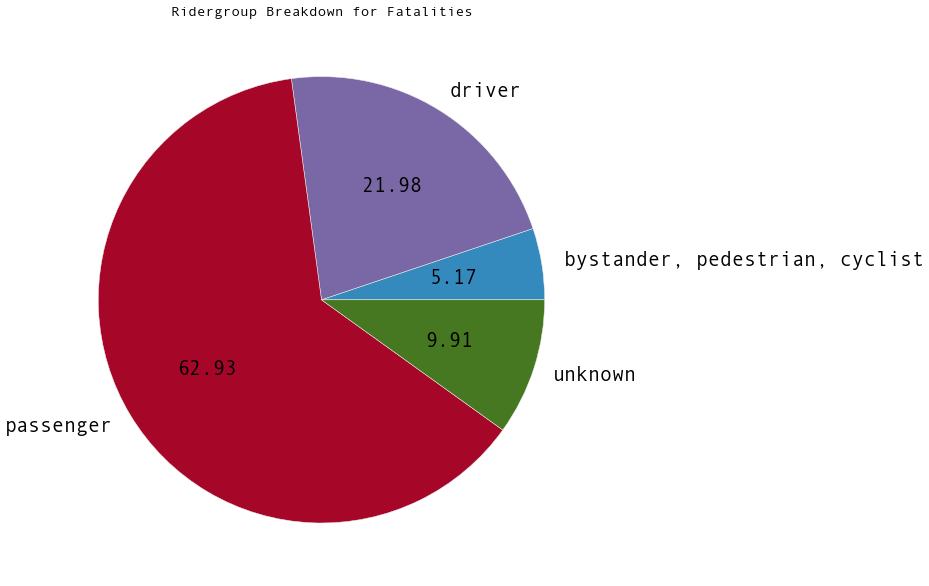

In [24]:
print killed.groupby(['ridergroup']).size()
killed.groupby(['ridergroup']).size().plot(kind='pie', figsize=(10,10), autopct='%.2f', fontsize=20, title="Ridergroup Breakdown for Fatalities")

ridergroup
bystander, pedestrian, cyclist     29
driver                             85
passenger                         689
unknown                            45
dtype: int64


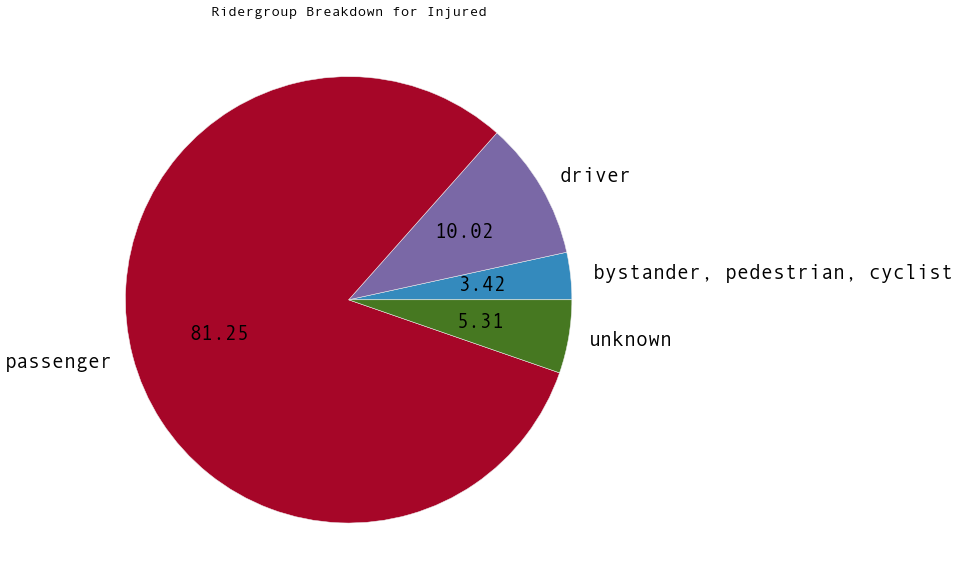

In [25]:
print injured.groupby(['ridergroup']).size()
injured.groupby(['ridergroup']).size().plot(kind='pie', figsize=(10,10), autopct='%.2f', fontsize=20, title="Ridergroup Breakdown for Injured")

# Looking at victim ages

In [26]:
victims.age = victims.age.dropna().str.strip()

In [27]:
victims.age.unique()


array(['29', '32', '18', '73', nan, 'adult', '49', '45', '53', '17', '16',
       '1.5', '31', '23', '43', '65', '2', '46', '25', '22', '3', '35',
       '6 months', '51', '7', '60', '5', '37', '8', '26',
       '10causeofdeath: thrown from motorcycle and run over by truckridergroup: motorcycle passenger',
       '71', '57', '12', '13', '21', '61', '50 to 60 years old', '30',
       '34', '42', '10', '50', '40', '36', '56', '68', '15', '38', '82',
       '14', '47', '33', '58', '28', '27', '24', '63', '44', '20', '6',
       'child', '41', '66', '80', '20+', 'minor', 'grandfather', '75',
       'childridergroup: jeepney passenger',
       '58gender: maleridergroup: passenger',
       '34 ridergroup: bus passenger', '19', '4', '74', '48', '39', '11',
       '1', '62'], dtype=object)

In [28]:
# manual cleanup of victim ages! some of these are overly specific to the
# errors in the csv file 

def clean_int(age):
    if age.isdigit():
        return float(age)
    else:
        return age
    
def clean_age(age):
    if type(age) == float:
        if age >= 45:
            return "45+"
        elif age >= 30:
            return "30 - 45"
        elif age >= 15:
            return "15 - 29"
        else:
            return "0 - 14"
    elif type(age) == str:
        if "child" in age:
            return "0 - 14"
            

victims.age = victims.age.dropna().apply(clean_int).apply(clean_age)

In [29]:
victims.age.unique()


array(['15 - 29', '30 - 45', '45+', nan, None, '0 - 14'], dtype=object)

In [30]:
# creates a new column "injured_killed" which contains whether someone was killed or injured
victims['injured_or_killed'] = victims.killed
victims['injured_or_killed'] = victims.injured_or_killed.replace(1,'killed')
victims['injured_or_killed'].fillna('injured', inplace=True)

In [31]:
victims.keys()


Index([u'event', u'event.1', u'killed', u'victim_info', u'injured', u'ridergroup', u'name', u'age', u'gender', u'profession', u'condition', u'injured_or_killed'], dtype='object')

injured_or_killed  age    
injured            0 - 14     37
                   15 - 29    64
                   30 - 45    42
                   45+        26
killed             0 - 14     12
                   15 - 29    29
                   30 - 45    14
                   45+        23
dtype: int64


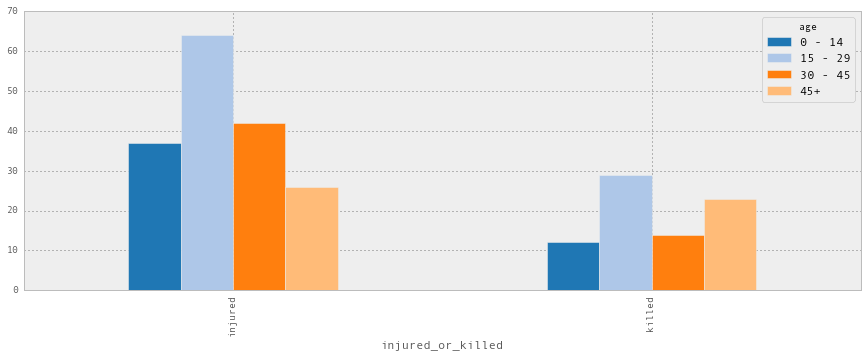

In [32]:
print victims.groupby(['injured_or_killed', 'age']).size()
victims.groupby(['injured_or_killed', 'age']).size().unstack().plot(kind='bar', color=tableau20)

In [33]:
victims.profession.dropna().value_counts()

 teacher                                             24
 student                                             17
 marine                                               7
 nurse                                                7
 truck helper                                         7
 elementary school student                            6
 bus driver                                           5
 policeman                                            4
 soldier                                              4
 security guard                                       3
 truck driver                                         3
 Department of Public Works and Highways employee     3
 security escort                                      3
 Mocha Girls performer                                3
 construction worker                                  2
...
 MNLF chairman                      1
 farmer                             1
 MMDA traffic constable             1
 military                           1
 MMD

In [34]:
def simplify_profession(profession):
    if "teacher" in profession:
        return "teacher"
    elif "student" in profession:
        return "student"
    elif "driver" in profession:
        return "driver"
    elif "enforcer" in profession:
        return "enforcer" 
    elif "MMDA" in profession:
        return "enforcer" 
    elif "conductor" in profession:
        return "conductor"
    else:
        return profession

In [35]:
victims.profession = victims.profession.dropna().apply(simplify_profession)
victims.profession.value_counts()

student                                                         25
teacher                                                         24
driver                                                          13
 marine                                                          7
 truck helper                                                    7
 nurse                                                           7
enforcer                                                         5
 policeman                                                       4
 soldier                                                         4
 Department of Public Works and Highways employee                3
conductor                                                        3
 security guard                                                  3
 security escort                                                 3
 Mocha Girls performer                                           3
 police                                                       